# Extended Graham scan algorithm

Use the cell below for all python code needed to realise the extended Graham scan algorithm (including any auxiliary data structures and functions you might need). The `extendedgrahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [36]:
#def extendedgrahamscan(inputSet):
import math
import random

def findBottomMost(inputSet):
    bottomMost = inputSet[0]
    for i in range(1,len(inputSet)):
        if inputSet[i][1] < bottomMost[1]:
            bottomMost = inputSet[i]
        elif inputSet[i][1] == bottomMost[1] and inputSet[i][0] < bottomMost[0]:
            bottomMost = inputSet[i]
    return bottomMost

def findTopMost(inputSet):
    topMost = inputSet[0]
    for i in range(1,len(inputSet)):
        if inputSet[i][1] > topMost[1]:
            topMost = inputSet[i]
        elif inputSet[i][1] == topMost[1] and inputSet[i][0] > topMost[0]:
            topMost = inputSet[i]
    return topMost

def findLeftMost(inputSet):
    leftMost = inputSet[0]
    for i in range(1,len(inputSet)):
        if inputSet[i][0] < leftMost[0]:
            leftMost = inputSet[i]
        elif inputSet[i][0] == leftMost[0] and inputSet[i][1] > leftMost[1]:
            leftMost = inputSet[i]
    return leftMost

def findRightMost(inputSet):
    rightMost = inputSet[0]
    for i in range(1,len(inputSet)):
        if inputSet[i][0] > rightMost[0]:
            rightMost = inputSet[i]
        elif inputSet[i][0] == rightMost[0] and inputSet[i][1] < rightMost[1]:
            rightMost = inputSet[i]
    return rightMost

def polarAngle(p2,p1):
    return math.atan2(p2[1]-p1[1],p2[0]-p1[0])

def distance(p2,p1):
    return (p2[0]-p1[0])**2 + (p2[1]-p1[1])**2

def crossProduct(p1,p2,p3):
    y1 = p1[1] - p2[1]
    y2 = p1[1] - p3[1]
    x1 = p1[0] - p2[0]
    x2 = p1[0] - p3[0]
    return y2 * x1 - y1 * x2

def partitionrand(arr,lo,hi,start):
 
    randpivot = random.randrange(lo, hi)

    arr[lo], arr[randpivot] = arr[randpivot], arr[lo]
    return partition(arr,lo,hi,start)

@profile
def partition(arr,lo,hi,start):
    i = lo+1
    j = hi
    p = arr[lo]

    while True:
        while polarAngle(arr[i],start) < polarAngle(p,start) or (polarAngle(arr[i],start)==polarAngle(p,start) and ((polarAngle(arr[i],start) > 0 and distance(arr[i],start) < distance(p,start)) or (polarAngle(arr[i],start) < 0 and distance(arr[i],start) > distance(p,start)))):
            if i==hi: break
            i+=1
        while polarAngle(p,start) < polarAngle(arr[j],start) or (polarAngle(arr[i],start)==polarAngle(p,start) and ((polarAngle(arr[i],start) > 0 and distance(arr[i],start) > distance(p,start)) or (polarAngle(arr[i],start) < 0 and distance(arr[i],start) < distance(p,start)))):
            if j==lo: break
            j-=1
        if i >= j: break
        arr[i],arr[j] = arr[j],arr[i]
    arr[lo],arr[j] = arr[j],arr[lo]
    return j

def quickSortHelper(a,lo,hi,start):
    if hi <= lo: return
    j = partition(a,lo,hi,start)
    quickSortHelper(a,lo,j-1,start)
    quickSortHelper(a,j+1,hi,start)

def quickSort(inputSet):
    start = findBottomMost(inputSet)
    quickSortHelper(inputSet,0,len(inputSet)-1,start)
    return inputSet

def eliminateDots(inputSet):
    res = inputSet.copy()
    b,t,l,r = findBottomMost(res), findTopMost(res), findLeftMost(res), findRightMost(res)
    topLeft = []
    bottomRight = []
    topRight = []
    bottomLeft = []
    for p in res:
        v = dotInArea(b,t,l,r,p)
        if v == 0:
            res.remove(p)
        elif v == 1:
            topLeft.append(p)
        elif v == 2:
            bottomRight.append(p)
        elif v == 3:
            topRight.append(p)
        elif v == 4:
            bottomLeft.append(p)
    for p in topLeft:
        if dotInTriangle(l,t,findLeftMost(topLeft),p):
            res.remove(p)
    for p in bottomRight:
        if dotInTriangle(r,b,findRightMost(bottomRight),p):
            res.remove(p)
    for p in topRight:
        if dotInTriangle(t,r,findTopMost(topRight),p):
            res.remove(p)
    for p in bottomLeft:
        if dotInTriangle(b,l,findBottomMost(bottomLeft),p):
            res.remove(p)
    return res

def dotInTriangle(p1,p2,p3,point): #p1,p2,p3 should be in anti-clockwise position
    if p1==p3 or p2==p3 or p1==p2: return
    v1 = crossProduct(p1,p2,point)
    v2 = crossProduct(p2,p3,point)
    v3 = crossProduct(p3,p1,point)
    if v1 <= 0 and v2 <= 0 and v3 <= 0:
        return True
    return False

def dotInArea(b,t,l,r,point):
    v1 = crossProduct(b,r,point)
    v2 = crossProduct(r,t,point)
    v3 = crossProduct(t,l,point)
    v4 = crossProduct(l,b,point)
    if v1 <= 0 and v2 <= 0 and v3 <= 0 and v4 <= 0:  #in middle
        return 0
    elif v3 >= 0:  #top left
        return 1
    elif v1 >= 0:  #bottom right
        return 2
    elif v2 >= 0:  #top right
        return 3
    elif v4 >= 0:
        return 4. #bottom left
    return -1
       

@profile
def grahamscan(inputSet):
    inputSet = eliminateDots(inputSet)
    start = findBottomMost(inputSet)
    inputSet.remove(start)
    sortedSet = quickSort(inputSet)
    outputSet = [start,sortedSet[0]]
    for point in sortedSet:
        while len(outputSet) >= 2 and crossProduct(outputSet[-2],outputSet[-1],point) <= 0:
            del outputSet[-1]
        outputSet.append(point)
    return outputSet

#    return outputSet

A profilling decorator @profile

In [37]:
import cProfile, pstats, io

def profile(fuc):
    def inner(*args, **kwargs):
        pr = cProfile.Profile()
        pr.enable()
        retval = fuc(*args, **kwargs)
        pr.disable()
        s = io.StringIO()
        sortby = 'cumulative'
        ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
        ps.print_stats()
        print(s.getvalue())
        return retval
    return inner

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [38]:
from random import *

from math import *

import matplotlib.pyplot as plt



# #Point objects have x and y coordinates

# class Point(object):
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y

MAXX = 32767
MAXY = 32767
MINX = 0
MINY = 0
MIDDLE = [(MAXX-MINX)/2, (MAXY-MINY)/2]
NS = [100, 500, 1000, 5000, 10000, 15000, 20000]

def generate_random(N):
    points = []
    for p in range(N):
        while True:
            x = randint(MINX, MAXX)
            y = randint(MINY, MAXY)
            point = [x,y]
            if point not in points:
                break
        points.append(point)
        
    return points

def generate_hull(N):
    angle = 0
    radius = 16383.5
    for p in range(N + 100):
        x = ceil(MIDDLEp[0] + (radius * cos(angle)))
        y = ceil(MIDDLE[1] + (radius * sin(angle)))
        point = [x,y]
        points.append(point)
        angle += (2*pi)/N
    return points 

inputSets = [generate_random(NS[n]) for n in range(7)]



Use the cell below for all python code needed to test the `extendedgrahamscan()` function on the data generated above.

In [39]:
import timeit

def timer():
    l = [(timeit.timeit(lambda: grahamscan(inputSets[n]), number = n)) for n in range(7)]
    print(l)

#timer()
inputSet = inputSets[0]
outputSet = grahamscan(inputSet)

         582 function calls in 0.001 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.001    0.001 <ipython-input-36-576edbe81d16>:61(partition)
      290    0.001    0.000    0.001    0.000 <ipython-input-36-576edbe81d16>:41(polarAngle)
      290    0.000    0.000    0.000    0.000 {built-in method math.atan2}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}



         118 function calls in 0.000 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-36-576edbe81d16>:61(partition)
       58    0.000    0.000    0.000    0.000 <ipython-input-36-576edbe81d16>:41(polarAngle)
       58    0.000    0.000    0.000    0.000 {built-in method math.atan2}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profil

*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

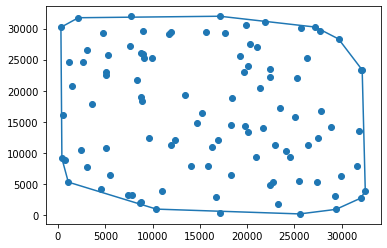

In [40]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 